# Basic Animation

Create a multi-canvas with 2 layers:
- the grid-world base
- the animation layer

Load a Baby Robot image and progressively move it across the animation layer, saving a snapshot of the multi-canvas at each position.

Join each of these snapshots to create an animated gif.

### load required libraries

In [1]:
import os
import shutil
from time import sleep
from ipycanvas import Canvas,hold_canvas
from ipycanvas import MultiCanvas
from ipywidgets import Layout, Play, Image, IntProgress, HBox, VBox, link
from IPython.display import Image as PyImage

### define the grid properties

In [2]:
cell_pixels = 64           # pixel dimensions of a grid square   
grid_width  = 3            # number of horizontal cells
grid_height = 3            # number of vertical cells 

width_pixels  = grid_width  * cell_pixels  # total horizontal pixels
height_pixels = grid_height * cell_pixels  # total vertical pixels

layers = 2
robot_size = 64
baby_robot = Image.from_file('../notebooks/images/baby_robot.png')  

### helper functions to create the grid level

In [3]:
def draw_base(canvas):
  canvas.fill_style = 'orange' 
  canvas.fill_rect(0, 0, canvas.width, canvas.height)


def draw_grid( canvas ):
  # with hold_canvas(canvas):
    canvas.stroke_style = '#777' # grid line color - medium gray
    canvas.line_width = 1
    canvas.set_line_dash([4,8])    

    # draw the grid onto the canvas
    for y in range(grid_height):   
      for x in range(grid_width):   
        canvas.stroke_rect(cell_pixels * x, cell_pixels * y, cell_pixels, cell_pixels)


def draw_border(canvas):
  canvas.stroke_style = 'black'
  canvas.line_width = 5
  canvas.set_line_dash([0,0])
  canvas.stroke_rect(0,0,width_pixels,height_pixels)         

### create the multi-canvas

In [4]:
# the initial position of Baby Robot (off LHS of image)
x = -40
y = 66

# the directory where each image will be written
image_folder = 'images/canvas_level'

if os.path.exists(image_folder):
  shutil.rmtree(image_folder)  
os.makedirs(f'{image_folder}', exist_ok=True) 

multi_canvas = MultiCanvas(layers,width=width_pixels, height=height_pixels, sync_image_data=True)
draw_base(multi_canvas[0])  
draw_grid(multi_canvas[0])
draw_border(multi_canvas[0]) 
multi_canvas

MultiCanvas(height=192, sync_image_data=True, width=192)

### run the level

- this produces an output image at each position

In [5]:
play = Play(interval=100, min=1, max=120, step=1)
progress = IntProgress(min=1, max=10, step=1)
link((play, 'value'), (progress, 'value'))

def on_update(*args): 
  global x
  with hold_canvas(multi_canvas[1]):
    multi_canvas[1].clear_rect(x, y, robot_size)                        
    multi_canvas[1].draw_image(baby_robot, x, y )   
    multi_canvas.to_file(f'{image_folder}/step_{x}.png')       
  x += 2  

play.observe(on_update, 'value')

layout = Layout(width=f'{width_pixels}px')
VBox((multi_canvas, HBox((play, progress))),layout=layout)

### create a gif movie from the images

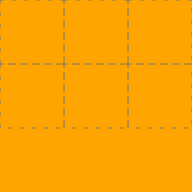

In [7]:
import imageio
file_path = 'images/canvas_run.gif'

with imageio.get_writer(file_path, mode='I', duration=0.08) as writer: 
  for index in range(-40,200,2):
    file = f"{image_folder}/step_{index}.png"
    if os.path.exists(file):
      image = imageio.imread(file)
      writer.append_data(image) 

# show the image
PyImage(filename=file_path)   